In [16]:
#importing library files 
import sys
import io
import pandas as pd 
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files 
  #please use this cell to upload the data file in case you are using google colab to run the file
  
uploaded = files.upload()

Saving day_1_data.csv to day_1_data.csv


In [ ]:
#reading the data from the file and performing few separation operations  
df = pd.read_csv(io.StringIO(uploaded['day_1_data.csv'].decode('utf-8')))
time = df['Time(Seconds)'].values

In [ ]:

#performing preprocessing by normalizing the values of sensor data and leaving apart the time value
x = df[['Time(Seconds)','gyroX[mdps]',	'gyroY[mdps]',	'gyroZ[mdps]',	'accX[mg]',	'accY[mg]',	'accZ[mg]']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the required data to fit minmax processor for selected features
x_scaled = min_max_scaler.fit_transform(x[:,1:])

# Run the normalizer on the dataframe 
df_normalized = pd.DataFrame(x_scaled)
#renaming the columns of the data frame
df_normalized.columns = ['gyroX[mdps]',	'gyroY[mdps]',	'gyroZ[mdps]',	'accX[mg]',	'accY[mg]',	'accZ[mg]']
print('this data frame represents the normalized data values of sensor value')
print(df_normalized)



this data frame represents the normalized data values of sensor value
         gyroX[mdps]  gyroY[mdps]  gyroZ[mdps]  accX[mg]  accY[mg]  accZ[mg]
0           0.500000     0.499985     0.499985  0.563008  0.429490  0.490239
1           0.435036     0.473752     0.421759  0.563008  0.429490  0.490239
2           0.499939     0.499680     0.499908  0.563008  0.429783  0.490489
3           0.499878     0.499558     0.499817  0.563697  0.428979  0.490740
4           0.499939     0.499542     0.499786  0.562758  0.429783  0.490740
...              ...          ...          ...       ...       ...       ...
2129934     0.500137     0.500320     0.498734  0.560318  0.413846  0.516581
2129935     0.500458     0.500000     0.498459  0.560568  0.413554  0.516581
2129936     0.500794     0.499664     0.498413  0.560568  0.413846  0.516331
2129937     0.500794     0.499298     0.498810  0.560068  0.413846  0.516581
2129938     0.500717     0.499253     0.499314  0.560568  0.414650  0.516081

[2129

Below is the time series graph of individual feature


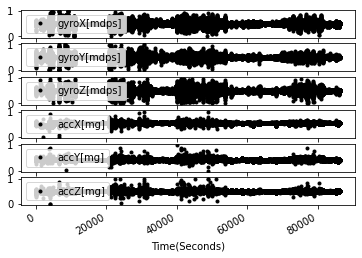

None


In [ ]:
#individually plotting the features i.e. the sensor data with respect to time 
df_normalized1= df_normalized
df_normalized1['Time(Seconds)'] = time
df_normalized1 = df_normalized1[['Time(Seconds)','gyroX[mdps]',	'gyroY[mdps]',	'gyroZ[mdps]',	'accX[mg]',	'accY[mg]',	'accZ[mg]']]
print('Below is the time series graph of individual feature')
print(df_normalized1.plot(x='Time(Seconds)',subplots = True,style = 'k.'))
print(plt.show())


In [8]:
#as from the above plots we can see there are outliers, below i try to trim them in order to get analysis or extract features of important data
# We use Z analysis method from statistics to identify the outliers and winsorating them with the nearest value in our case the mean value of the feature
outlier = {} # dictionary to store the outliers of individual features
columns = ['gyroX[mdps]',	'gyroY[mdps]',	'gyroZ[mdps]',	'accX[mg]',	'accY[mg]',	'accZ[mg]']
main_list=[]
for j in columns:
  list1 =[]
  mean = np.mean(df_normalized[j])
  std = np.std(df_normalized[j])
  for i in range(len((df_normalized[j]))):
    z = (df_normalized[j][i]-mean)/std 
    if z > 3: # check for the condition if the z value i.e original value - mean /standard deviation 
      list1.append(z)
      df_normalized[j][i] = mean 
  main_list.append(list1)        
print(main_list)
for j in range(len(columns)):
  outlier[j]=main_list[j]

print(outlier)

[[3.209428032144902, 3.0777421837570245, 3.201115461611427, 3.463540156680842, 3.2388903074534166, 3.301497642484011, 3.399985819943902, 3.3585808008942615, 3.430395096958763, 3.1965382866974297, 3.470905725507971, 3.0842133620837138, 3.228736344713163, 3.291343679743757, 3.429448095252417, 3.4552275861473674, 3.182701539543605, 3.2738767593822815, 3.4745885099215355, 3.3990914294434695, 3.4561745878537136, 3.286766504829753, 3.1302481672532716, 3.323594348965397, 3.4994209991101397, 3.550085590399608, 3.2084810304385556, 3.321752956758618, 3.579547865708123, 3.3954086450299052, 3.4543331956469348, 3.002245103278952, 3.304233425191229, 3.549138588693262, 3.378836115168862, 3.1016802824451895, 3.0492269101548555, 3.0400199491209414, 3.4837954709554495, 3.1818071490431725, 3.304233425191229, 3.229683346419509, 3.0188176331399945, 3.5123107445576185, 3.417505351511291, 3.4386550562863314, 3.156027658148222, 3.408298390477377, 3.3604221931010403, 3.515099138470743, 3.2204763853855947, 3.55

In [9]:
# This section of code prints the outliers present in the individual features
final_outlier = dict(zip(columns, list(outlier.values()))) 
print("Below is the dictionary of the outlier values of different features ")
print(str(final_outlier))
print(str(final_outlier['gyroX[mdps]']))
print(str(final_outlier['gyroY[mdps]']))
print(str(final_outlier['gyroZ[mdps]']))
print(str(final_outlier['accX[mg]']))
print(str(final_outlier['accY[mg]']))
print(str(final_outlier['accZ[mg]']))

Below is the dictionary of the outlier values of different features 
{'gyroX[mdps]': [3.209428032144902, 3.0777421837570245, 3.201115461611427, 3.463540156680842, 3.2388903074534166, 3.301497642484011, 3.399985819943902, 3.3585808008942615, 3.430395096958763, 3.1965382866974297, 3.470905725507971, 3.0842133620837138, 3.228736344713163, 3.291343679743757, 3.429448095252417, 3.4552275861473674, 3.182701539543605, 3.2738767593822815, 3.4745885099215355, 3.3990914294434695, 3.4561745878537136, 3.286766504829753, 3.1302481672532716, 3.323594348965397, 3.4994209991101397, 3.550085590399608, 3.2084810304385556, 3.321752956758618, 3.579547865708123, 3.3954086450299052, 3.4543331956469348, 3.002245103278952, 3.304233425191229, 3.549138588693262, 3.378836115168862, 3.1016802824451895, 3.0492269101548555, 3.0400199491209414, 3.4837954709554495, 3.1818071490431725, 3.304233425191229, 3.229683346419509, 3.0188176331399945, 3.5123107445576185, 3.417505351511291, 3.4386550562863314, 3.156027658148222

In [12]:
#Performing dimensionality reduction for ease of analysis
#PCA is very sensitive to outliers,hence it as outliers were truncated in the previous steps.
#PCA helps maximize the variances by minimizing the reconstruction error.
pca = PCA(n_components=1) # n no of components is selected as 1 with reference to gryoscope and accelometer sensor data
X_pca = pca.fit_transform(df_normalized)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1'])
PCA_df['Time(Seconds)'] = time
PCA_df = PCA_df[['Time(Seconds)','PC1']]
print('Below is the dataset after dimensionality reduction')
print('****************************************************')
print(PCA_df)

Below is the dataset after dimensionality reduction
****************************************************
         Time(Seconds)           PC1
0                0.000  43220.955449
1                0.009  43220.946449
2                0.050  43220.905449
3                0.090  43220.865449
4                0.130  43220.825449
...                ...           ...
2129934      86399.820 -43178.864551
2129935      86399.860 -43178.904551
2129936      86399.900 -43178.944551
2129937      86399.941 -43178.985551
2129938      86399.981 -43179.025551

[2129939 rows x 2 columns]


In [47]:
# here we perform KMeans clustering - i.e. unsupervised clustering algorithm after performing PCA in order to extract important features into groups so that it is easy for further analysis
# as kmeans is sensitive to intialization we use kmeans++ for that purpose
#inorder to find the optimal number of clusters required we consider wcss 
#Within-Cluster-Sum-of-Squares helps find the distance of each data point of cluster w.r.t it's centroid
data = PCA_df.iloc[:,0:2] # differentianting the sensor data after performing dimensionality reduction
wcss = [] #empty list for calculating wcss after each iter
for i in range(1,100):
  kmeans =KMeans(i) 
  kmeans.fit(data) # intially time is also being considered for segregating into groups 
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)



In [48]:
print(wcss)

[2648923481855416.5, 662827038602085.6, 294113491680729.56]


Text(0, 0.5, 'Within-cluster-sum-of-squares')

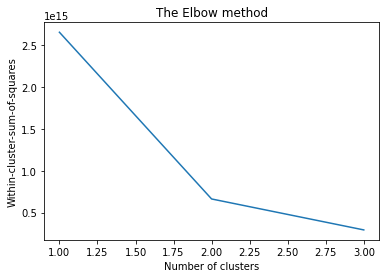

In [49]:
# finding out the optimal number of clusters required using elbow method
number_of_clusters = range(1,100)
plt.plot(number_of_clusters,wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster-sum-of-squares')

In [50]:
#results from clustering 
kmeans_new = KMeans(20)
identified_clusters = kmeans_new.fit_predict(data) #predicting dependent of time
cluster_data = PCA_df.copy()
cluster_data['Cluster'] = identified_clusters
print('identified cluster groups labels')
print('************************************')
print(cluster_data)
print('************************************')


identified cluster groups labels
************************************
         Time(Seconds)           PC1  Cluster
0                0.000  43220.955449        3
1                0.009  43220.946449        3
2                0.050  43220.905449        3
3                0.090  43220.865449        3
4                0.130  43220.825449        3
...                ...           ...      ...
2129934      86399.820 -43178.864551       13
2129935      86399.860 -43178.904551       13
2129936      86399.900 -43178.944551       13
2129937      86399.941 -43178.985551       13
2129938      86399.981 -43179.025551       13

[2129939 rows x 3 columns]
************************************


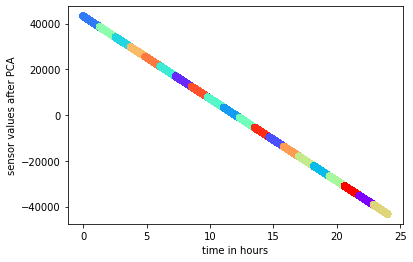

In [51]:
# Now we try plotting the scatter plot of the clustered data with respect to time
cluster_data['Time(Seconds)']=cluster_data['Time(Seconds)']/3600
plt.scatter(cluster_data['Time(Seconds)'],cluster_data['PC1'],c=cluster_data['Cluster'],cmap='rainbow')
plt.xlabel('time in hours')
plt.ylabel('sensor values after PCA')
plt.show()

In [52]:
#above you can the features categorized based on time and dimenionally reduced data of sensors